In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
def get_exponents(n_variables, degree):
    """Generates the eponents for all the monomials of degreeGenerates a list of lists using a recursive function"""
    #initial step
    if n_variables == 1:
        yield [degree]
        return
    #recursive step
    for i in range(degree + 1):
        for t in get_exponents(n_variables - 1, degree - i):
            yield [i] + t

def exponents(n_variables, degree):
    """Transforms the output of get_exponents in a numpy array"""
    #create a list
    exp = [e for e in get_exponents(n_variables, degree)]
    #cast it to np.array
    exp = np.array(exp)
    return exp

def gen_new_features(x, degree):
    """Generate the new features, generated using an homogeneous polynomial of a given degree.
    # Input: 
    x, array of shape (n_samples, n_initial_features)
    # Returns: 
    res, array  of shape (n_samples, n_monomials_in_homogeneous_polynomial)"""
    #reshape x to allow broadcasting
    x =  np.expand_dims(x, axis = 1)
    #get the exponents
    exp = exponents(n_variables=x.shape[-1], degree= degree )
    #compute the new features
    res = x**exp
    res = res.prod(axis = -1)
    return res
    
#test the functions
#create the fake data
x = (np.arange(3)+2).reshape(1, -1)
x = np.append(x, x, axis = 0)

x, gen_new_features(x, 2)

(array([[2, 3, 4],
        [2, 3, 4]]),
 array([[16, 12,  9,  8,  6,  4],
        [16, 12,  9,  8,  6,  4]], dtype=int32))

In [3]:
from sklearn.linear_model import LogisticRegression

#import data
data = pd.read_csv('./data/train.csv.zip')
data.replace( -999., np.NaN, inplace=True)

#remove the columns containing missing values
#DER columns
der_headers = [x for x in data.columns if 'DER' in x]
#PRI columns containing lead
leading_pri_headers = [x for x in data.columns if 'leading' in x]
data.drop(columns=der_headers+leading_pri_headers, inplace = True)

x = data.drop(columns=['Prediction'])
x = x.values[:10000]
y = data['Prediction'][:10000]

#linear regression
clf = LogisticRegression(random_state=0).fit(x, y)
print('Linear, training set score:', clf.score(x, y))


Linear, training set score: 0.6738


In [4]:
new_features = gen_new_features(x, 2)
x = np.append(x, new_features, axis = 1)
clf = LogisticRegression(random_state=0).fit(x, y)
print('Linear, training set score:', clf.score(x, y))

Linear, training set score: 0.677


In [5]:
new_features = gen_new_features(x, 3)
x = np.append(x, new_features, axis = 1)
clf = LogisticRegression(random_state=0).fit(x, y)
print('Linear, training set score:', clf.score(x, y))

MemoryError: Unable to allocate 842. GiB for an array with shape (10000, 125580, 90) and data type float64

In [6]:
def number_monomials(n_variables, degree):
    """Computes how many ters has an homogeneous polynomial of a given degree and 
    with a given n_variables"""
    a = np.math.factorial(n_variables + degree - 1)
    b = np.math.factorial(degree)
    c = np.math.factorial(n_variables - 1)
    return a/(b*c)

84 84.0


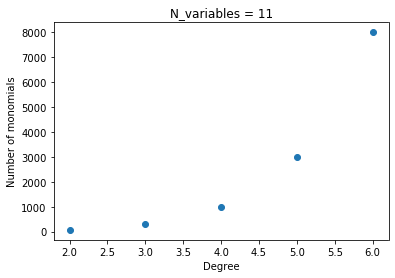

In [8]:
import matplotlib.pyplot as plt
n_variables = 4
degree = 6

#check that the feature generator is working properly
features = gen_new_features(np.arange(n_variables).reshape(1, -1), degree)
print(features.shape[-1], number_monomials(n_variables, degree))

#make a plot
n_variables = 11
y = [number_monomials(n_variables, degree) for degree in range(2, 7)]
x = [ degree for degree in range(2, 7)]

ax = plt.scatter(x, y)
_ = plt.xlabel('Degree')
_ = plt.ylabel('Number of monomials')
_ = plt.title('N_variables = 11')

In [9]:
print(y)

[66.0, 286.0, 1001.0, 3003.0, 8008.0]
